In [1]:
library(ggplot2)

In [5]:
skillA_range <- 10
skillB_range <- 10
dicesides <- 10
simulateEncounters <- 50
simulateBattle <- 100

In [6]:
df <- data.frame(encounter=integer(),battle=integer(),
                 player1_skillA=integer(),player2_skillA=integer(),
                 player1_skillB=integer(),player2_skillB=integer(),
                 player1_score=integer(),player2_score=integer(),
                 stringsAsFactors=FALSE)

In [7]:
for (encounter in 1:simulateEncounters){
  player1_skillA <- floor(runif(1,1,skillA_range))
  player1_skillB <- floor(runif(1,1,skillB_range))
  player2_skillA <- floor(runif(1,1,skillA_range))
  player2_skillB <- floor(runif(1,1,skillB_range))
  for (battle in 1:simulateBattle){
    player1_diceroll <- floor(runif(1,1,dicesides)) + player1_skillA + player1_skillB
    player2_diceroll <- floor(runif(1,1,dicesides)) + player2_skillA + player2_skillB
    df <- rbind(df,data.frame(encounter,battle,player1_skillA,player1_skillB,battle,player2_skillA,player2_skillB,player1_diceroll,player2_diceroll))
  }
}

In [8]:
df_f <- data.frame(factor(df$encounter),factor(df$battle)
                   ,factor(df$player1_skillA),factor(df$player2_skillA)
                   ,factor(df$player1_skillB),factor(df$player2_skillB)
                   ,df$player1_diceroll,df$player2_diceroll)
colnames(df_f) <- c('enc','bat','p1A','p2A','p1B','p2B','scoreA','scoreB')
df_f <- transform(df_f,result = scoreB-scoreA, setup=paste("A(",p1A,",",p1B,") B(",p2A,",",p2B,")",sep=""))

In [9]:
scores_mean <- aggregate(list(df_f$result), 
                         by=list(df_f$setup), 
                         FUN=mean)
colnames(scores_mean) <- c('setup','meanscore')
so <- names(scores_mean)[order(df_f[,-1])]
so <- order(scores_mean$meanscore)

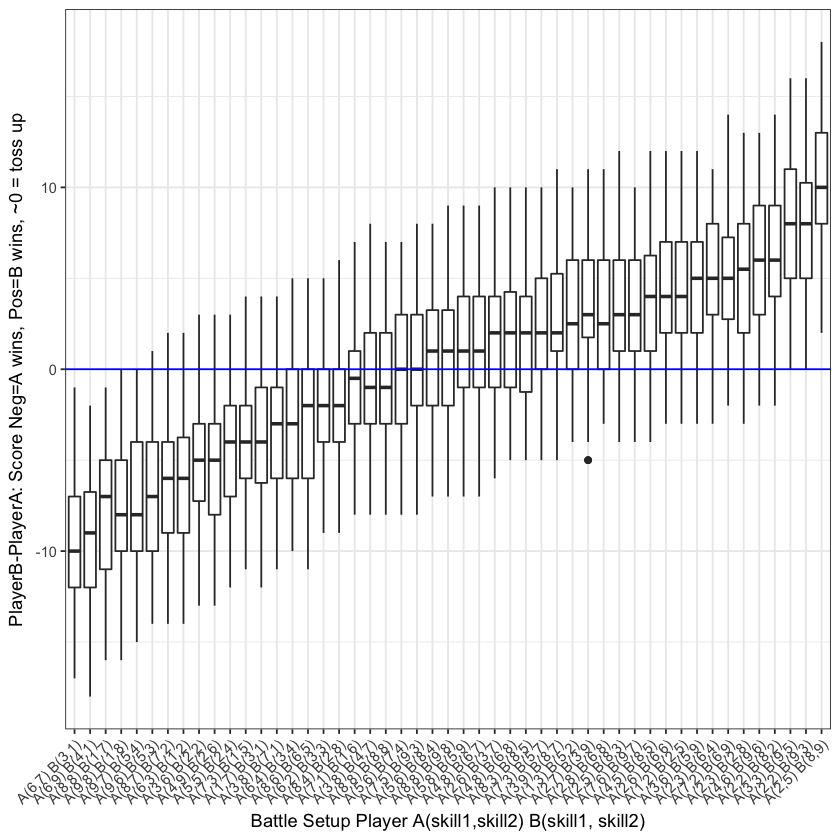

In [10]:
ggplot(data=df_f) + geom_boxplot(aes(factor(setup,levels=scores_mean[so,1], order=T),result)) +
  ylab("PlayerB-PlayerA: Score Neg=A wins, Pos=B wins, ~0 = toss up") +
  xlab("Battle Setup Player A(skill1,skill2) B(skill1, skill2)") +
  geom_hline(yintercept =  0,  color='blue') +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) 